In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
import pandas_ta as ta

---

## For **prepare_data** function

In [3]:
data = prepare_data()
data

,Open,High,Low,Close
Date,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971
...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176


In [4]:
data.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

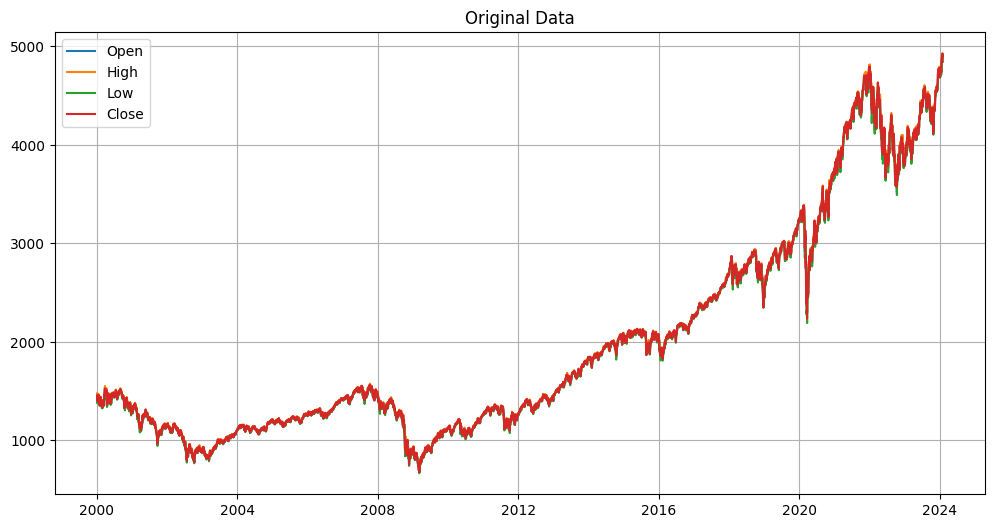

In [5]:
plt = config_chart('Original Data')
plt.plot(data)
plt.legend(['Open', 'High', 'Low', 'Close'])

---

## For **add_indicators** function

In [6]:
extended_data = add_indicators(data)
extended_data

,Open,High,Low,Close
Date,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971
...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176


In [7]:
# plt = config_chart('RSI Indicator')
# plt.plot(extended_data['RSI'])
# plt.legend(['RSI'])

In [8]:
# plt = config_chart('Simple Moving Average')
# plt.plot(extended_data['SMA'])
# plt.legend(['SMA'])

---

## For **normalize_data** function

In [9]:
print(data)
normalized_data = normalize_data(data)
print(normalized_data)
normalized_data

                   Open         High          Low        Close
Date                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971
...                 ...          ...          ...          ...
2024-01-25  4886.660156  4898.149902  4869.339844  4894.160156
2024-01-26  4888.910156  4906.689941  4881.470215  4890.970215
2024-01-29  4892.950195  4929.310059  4887.399902  4927.930176
2024-01-30  4925.890137  4931.089844  4916.270020  4924.970215
2024-01-31  4899.189941  4906.750000  4845.149902  4845.649902

[6058 rows x 4 columns]
                Open      High       Low     Close
Date                                              
2000-01-03  0.250545  0.252186  0.244750  0.247913
200

,Open,High,Low,Close
Date,,,,
2000-01-03,0.250545,0.252186,0.244750,0.247913
2000-01-04,0.247913,0.247913,0.237071,0.237444
2000-01-05,0.237444,0.240043,0.233366,0.237949
2000-01-06,0.237949,0.239786,0.236071,0.238200
2000-01-07,0.238200,0.245333,0.237690,0.245333
...,...,...,...,...
2024-01-25,0.891665,0.893820,0.888415,0.893072
2024-01-26,0.892087,0.895422,0.890691,0.892473
2024-01-29,0.892845,0.899666,0.891804,0.899407


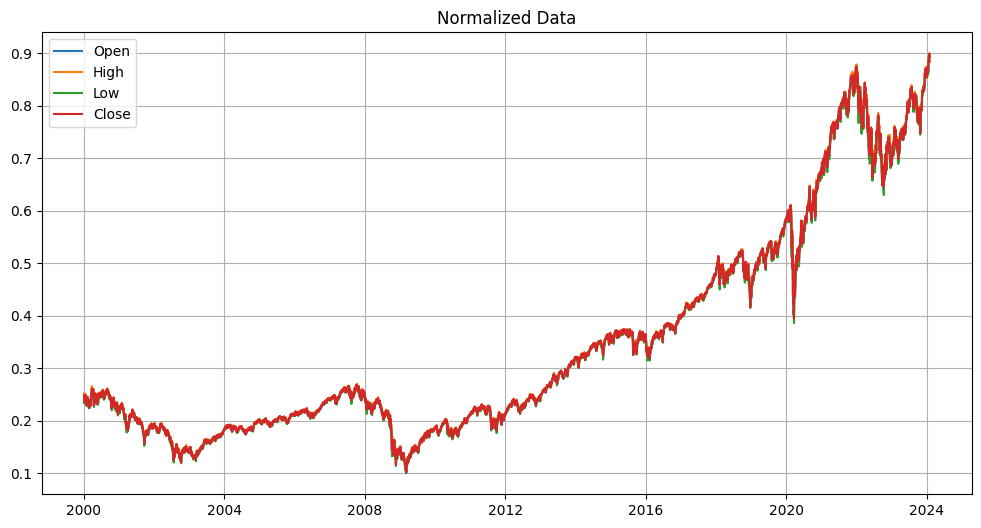

In [10]:
plt = config_chart('Normalized Data')
plt.plot(normalized_data)
plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [11]:
x, y, x_dates, y_dates = prepare_sequences(normalized_data)

In [12]:
x.shape, y.shape, x_dates.shape, y_dates.shape

((6044, 10, 4), (6044, 3, 4), (6044, 10), (6044, 3))

In [13]:
y

array([[[0.24789767, 0.2490702 , 0.24668576, 0.24804025],
        [0.24804025, 0.24988064, 0.24478345, 0.24610229],
        [0.24610229, 0.24752998, 0.2449823 , 0.24531248]],

       [[0.24804025, 0.24988064, 0.24478345, 0.24610229],
        [0.24610229, 0.24752998, 0.2449823 , 0.24531248],
        [0.24531248, 0.24770068, 0.23669396, 0.23784022]],

       [[0.24610229, 0.24752998, 0.2449823 , 0.24531248],
        [0.24531248, 0.24770068, 0.23669396, 0.23784022],
        [0.23784022, 0.24022842, 0.23539386, 0.23943486]],

       ...,

       [[0.89202124, 0.89485783, 0.88777761, 0.88826723],
        [0.89166481, 0.89382033, 0.88841545, 0.89307184],
        [0.89208692, 0.89542248, 0.89069116, 0.89247339]],

       [[0.89166481, 0.89382033, 0.88841545, 0.89307184],
        [0.89208692, 0.89542248, 0.89069116, 0.89247339],
        [0.89284485, 0.89966611, 0.89180359, 0.89940723]],

       [[0.89208692, 0.89542248, 0.89069116, 0.89247339],
        [0.89284485, 0.89966611, 0.89180359, 0.89

In [14]:
y[0], y_dates[0]

(array([[0.24789767, 0.2490702 , 0.24668576, 0.24804025],
        [0.24804025, 0.24988064, 0.24478345, 0.24610229],
        [0.24610229, 0.24752998, 0.2449823 , 0.24531248]]),
 array(['2000-01-19T00:00:00.000000000', '2000-01-20T00:00:00.000000000',
        '2000-01-21T00:00:00.000000000'], dtype='datetime64[ns]'))

In [15]:
x[0], x_dates[0]

(array([[0.24791267, 0.24791267, 0.23707105, 0.23744438],
        [0.23744438, 0.24004269, 0.23336587, 0.23794902],
        [0.23794902, 0.23978568, 0.23607111, 0.23820041],
        [0.23820041, 0.24533312, 0.23769013, 0.24533312],
        [0.24533312, 0.24962738, 0.24533312, 0.24835917],
        [0.24835917, 0.24855804, 0.24401052, 0.24478721],
        [0.24478721, 0.24554511, 0.24263349, 0.24360341],
        [0.24360341, 0.24772131, 0.24360341, 0.24687336],
        [0.24687336, 0.25124828, 0.24687336, 0.24977559],
        [0.24977559, 0.24977559, 0.24717728, 0.24789767]]),
 array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
        '2000-01-06T00:00:00.000000000', '2000-01-07T00:00:00.000000000',
        '2000-01-10T00:00:00.000000000', '2000-01-11T00:00:00.000000000',
        '2000-01-12T00:00:00.000000000', '2000-01-13T00:00:00.000000000',
        '2000-01-14T00:00:00.000000000', '2000-01-18T00:00:00.000000000'],
       dtype='datetime64[ns]'))

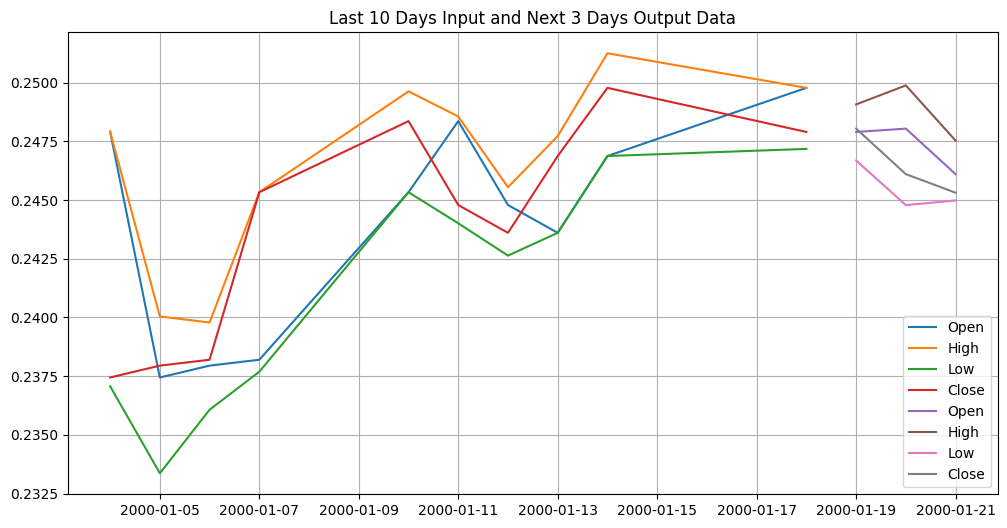

In [16]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0])
plt.plot(y_dates[0], y[0])
plt.legend(['Open', 'High', 'Low', 'Close', 'Open', 'High', 'Low', 'Close'])


---

## For **split_train_and_test_data** function

In [17]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [18]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

((4835, 10, 4), (4835, 10), (4835, 3, 4), (4835, 3))

In [19]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

((604, 10, 4), (604, 10), (604, 3, 4), (604, 3))

In [20]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

((605, 10, 4), (605, 10), (605, 3, 4), (605, 3))

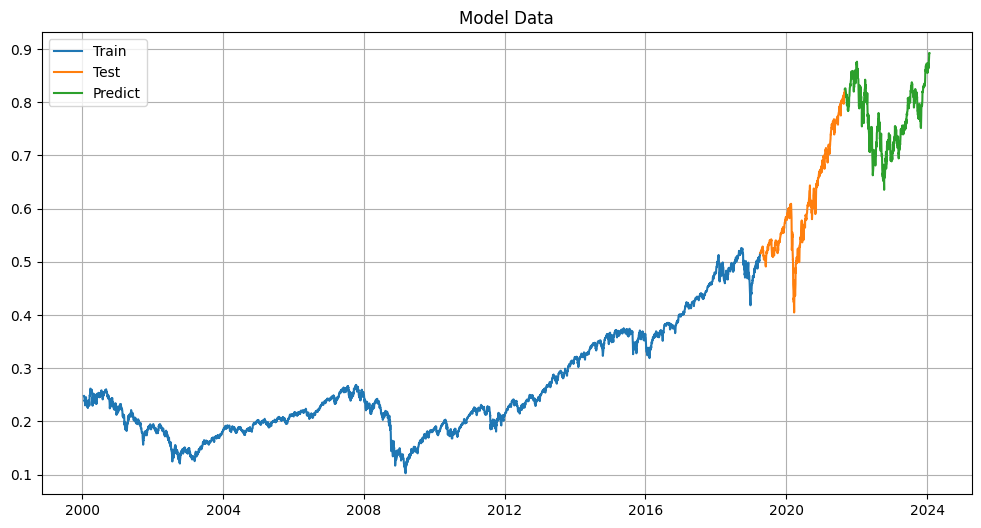

In [21]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [22]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [23]:
# x_train.shape, y_train.shape

In [24]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [25]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [26]:
# x_test.shape, y_test.shape

In [27]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [28]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [29]:
train, test, predict = get_lstm_data()

In [30]:
print(train['x'].shape) 
print(train['x'][0])

print(train['x_dates'].shape) 
print(train['x_dates'][0])

print(train['y'].shape)
print(train['y'][0])

print(train['y_dates'].shape) 
print(train['y_dates'][0])

(4835, 10, 4)
[[0.24791267 0.24791267 0.23707105 0.23744438]
 [0.23744438 0.24004269 0.23336587 0.23794902]
 [0.23794902 0.23978568 0.23607111 0.23820041]
 [0.23820041 0.24533312 0.23769013 0.24533312]
 [0.24533312 0.24962738 0.24533312 0.24835917]
 [0.24835917 0.24855804 0.24401052 0.24478721]
 [0.24478721 0.24554511 0.24263349 0.24360341]
 [0.24360341 0.24772131 0.24360341 0.24687336]
 [0.24687336 0.25124828 0.24687336 0.24977559]
 [0.24977559 0.24977559 0.24717728 0.24789767]]
(4835, 10)
['2000-01-04T00:00:00.000000000' '2000-01-05T00:00:00.000000000'
 '2000-01-06T00:00:00.000000000' '2000-01-07T00:00:00.000000000'
 '2000-01-10T00:00:00.000000000' '2000-01-11T00:00:00.000000000'
 '2000-01-12T00:00:00.000000000' '2000-01-13T00:00:00.000000000'
 '2000-01-14T00:00:00.000000000' '2000-01-18T00:00:00.000000000']
(4835, 3, 4)
[[0.24789767 0.2490702  0.24668576 0.24804025]
 [0.24804025 0.24988064 0.24478345 0.24610229]
 [0.24610229 0.24752998 0.2449823  0.24531248]]
(4835, 3)
['2000-01-19T

In [31]:
print(test['x'].shape) 
print(test['x'][0])

print(test['x_dates'].shape) 
print(test['x_dates'][0])

print(test['y'].shape)
print(test['y'][0])

print(test['y_dates'].shape) 
print(test['y_dates'][0])

(604, 10, 4)
[[0.50257393 0.50580263 0.50094742 0.50366204]
 [0.50389842 0.50499405 0.49789509 0.50120633]
 [0.50196234 0.50389655 0.49996813 0.50309547]
 [0.50550245 0.50695826 0.5038065  0.50665244]
 [0.50932204 0.51321858 0.50932204 0.51280398]
 [0.51300098 0.5138752  0.51122062 0.51281337]
 [0.51447369 0.51619212 0.51242502 0.513969  ]
 [0.5140797  0.51544734 0.51279459 0.51509274]
 [0.51598762 0.51769108 0.51576814 0.51759728]
 [0.51679433 0.51819948 0.51535354 0.51816572]]
(604, 10)
['2019-03-26T00:00:00.000000000' '2019-03-27T00:00:00.000000000'
 '2019-03-28T00:00:00.000000000' '2019-03-29T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-04-02T00:00:00.000000000'
 '2019-04-03T00:00:00.000000000' '2019-04-04T00:00:00.000000000'
 '2019-04-05T00:00:00.000000000' '2019-04-08T00:00:00.000000000']
(604, 3, 4)
[[0.51644165 0.5164979  0.5139559  0.51486951]
 [0.51546424 0.51702883 0.51504396 0.51674742]
 [0.51744343 0.51772483 0.51558053 0.51676808]]
(604, 3)
['2019-04-09T00:0

In [32]:
print(predict['x'].shape) 
print(predict['x'][0])

print(predict['x_dates'].shape) 
print(predict['x_dates'][0])

print(predict['y'].shape)
print(predict['y'][0])

print(predict['y_dates'].shape) 
print(predict['y_dates'][0])

(605, 10, 4)
[[0.81201937 0.81201937 0.80371038 0.8093854 ]
 [0.80804588 0.81055601 0.79991323 0.80041604]
 [0.79707105 0.80385667 0.7943114  0.80145345]
 [0.8023465  0.80868564 0.80164106 0.80818283]
 [0.8098     0.81722722 0.8098     0.8152855 ]
 [0.81619915 0.81777693 0.81580141 0.81654248]
 [0.81733421 0.81944659 0.81643558 0.81841101]
 [0.81795327 0.8183566  0.81330823 0.81349767]
 [0.81426686 0.82162657 0.81426686 0.82088366]
 [0.82170718 0.82613465 0.82170718 0.82452692]]
(605, 10)
['2021-08-17T00:00:00.000000000' '2021-08-18T00:00:00.000000000'
 '2021-08-19T00:00:00.000000000' '2021-08-20T00:00:00.000000000'
 '2021-08-23T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-25T00:00:00.000000000' '2021-08-26T00:00:00.000000000'
 '2021-08-27T00:00:00.000000000' '2021-08-30T00:00:00.000000000']
(605, 3, 4)
[[0.82470701 0.82501471 0.8220899  0.82338069]
 [0.82452875 0.82608775 0.82325684 0.82364514]
 [0.82559438 0.82772746 0.82375214 0.8260578 ]]
(605, 3)
['2021-08-31T00:0